# Wrangling

In [4]:
import zipfile

In [7]:
with zipfile.ZipFile('armenian-online-job-postings.zip','r') as myzip:
    myzip.extractall()
#zipfile.ZipFile(armenian-online-job-postings.zip,mode'r')

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/Users/amit/Desktop/udacity/wrangling/online-job-postings.csv')

In [11]:
df.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
jobpost             19001 non-null object
date                19001 non-null object
Title               18973 non-null object
Company             18994 non-null object
AnnouncementCode    1208 non-null object
Term                7676 non-null object
Eligibility         4930 non-null object
Audience            640 non-null object
StartDate           9675 non-null object
Duration            10798 non-null object
Location            18969 non-null object
JobDescription      15109 non-null object
JobRequirment       16479 non-null object
RequiredQual        18517 non-null object
Salary              9622 non-null object
ApplicationP        18941 non-null object
OpeningDate         18295 non-null object
Deadline            18936 non-null object
Notes               2211 non-null object
AboutC              12470 non-null object
Attach              1559 non-null object
Year              

- Missing Values (NaN)
- Startdate inconsistency

In [13]:
df_clean = df.copy()

In [14]:
df_clean = df_clean.rename(columns={'ApplicationP': 'ApplicationProcedure',
                                    'AboutC': 'AboutCompany',
                                    'RequiredQual': 'RequiredQualifications',
                                    'JobRequirment': 'JobRequirements'})

In [15]:
asap_list = ['Immediately', 'As soon as possible', 'Upon hiring',
             'Immediate', 'Immediate employment', 'As soon as possible.', 'Immediate job opportunity',
             '"Immediate employment, after passing the interview."',
             'ASAP preferred', 'Employment contract signature date',
             'Immediate employment opportunity', 'Immidiately', 'ASA',
             'Asap', '"The position is open immediately but has a flexible start date depending on the candidates earliest availability."',
             'Immediately upon agreement', '20 November 2014 or ASAP',
             'immediately', 'Immediatelly',
             '"Immediately upon selection or no later than November 15, 2009."',
             'Immediate job opening', 'Immediate hiring', 'Upon selection',
             'As soon as practical', 'Immadiate', 'As soon as posible',
             'Immediately with 2 months probation period',
             '12 November 2012 or ASAP', 'Immediate employment after passing the interview',
             'Immediately/ upon agreement', '01 September 2014 or ASAP',
             'Immediately or as per agreement', 'as soon as possible',
             'As soon as Possible', 'in the nearest future', 'immediate',
             '01 April 2014 or ASAP', 'Immidiatly', 'Urgent',
             'Immediate or earliest possible', 'Immediate hire',
             'Earliest  possible', 'ASAP with 3 months probation period.',
             'Immediate employment opportunity.', 'Immediate employment.',
             'Immidietly', 'Imminent', 'September 2014 or ASAP', 'Imediately']

for phrase in asap_list:
    df_clean.StartDate.replace(phrase, 'ASAP', inplace=True)

In [16]:
df_clean.StartDate.value_counts()

ASAP                                      6856
01 September 2012                           31
March 2006                                  27
November 2006                               22
January 2010                                19
February 2014                               17
01 February 2005                            17
TBD                                         16
February 2011                               16
September 2010                              16
March 2011                                  15
September 2008                              15
01 July 2014                                14
01 February 2015                            14
February 2007                               14
01 September 2010                           13
01 September 2008                           13
01 March 2006                               13
January 2016                                13
01 October 2012                             12
01 April 2014                               12
01 October 20

In [17]:
for phrase in asap_list:
    assert phrase not in df_clean.StartDate.values

In [20]:
asap_counts=df_clean.StartDate.value_counts()['ASAP']
asap_counts


6856

In [22]:
non_empty=df_clean.StartDate.count()

In [23]:
asap_counts/non_empty

0.7086304909560723

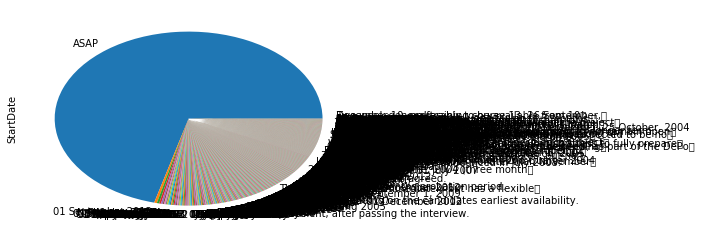

In [24]:
df_clean.StartDate.value_counts().plot(kind='pie')

In [25]:
import numpy as np

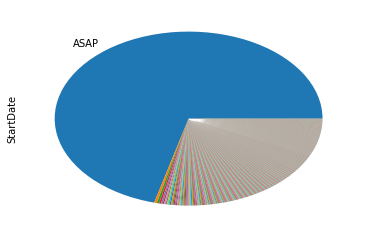

In [26]:
labels=np.full(len(df_clean.StartDate.value_counts()),"",dtype=object)
labels[0]='ASAP'
df_clean.StartDate.value_counts().plot(kind='pie',labels=labels)

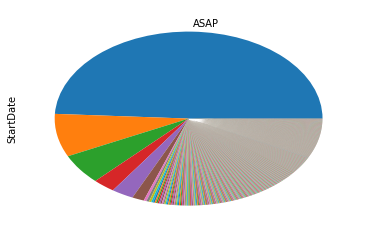

In [27]:
labels=np.full(len(df.StartDate.value_counts()),"",dtype=object)
labels[0]='ASAP'
df.StartDate.value_counts().plot(kind='pie',labels=labels)

# Gathering

In [43]:
df=pd.read_csv('bestofrt.tsv',sep='\t')

In [45]:
import requests

In [47]:
from bs4 import BeautifulSoup
with open('/Users/amit/Desktop/udacity/wrangling/Extraterrestrial (2014) - Rotten Tomatoes.html') as file:
    soup=BeautifulSoup(file,'lxml')

In [49]:
soup.find('title')

<title>Extraterrestrial (2014) - Rotten Tomatoes</title>

In [51]:
soup.find('title').contents[0][:-len(' - Rotten Tomatoes')]

'Extraterrestrial (2014)'

In [58]:
df_list = []
folder = 'rt_html/'
for movie_html in os.listdir(folder):
    with open(os.path.join(folder, movie_html)) as file:
        soup=BeautifulSoup(file,'lxml')
        title=soup.find('title').contents[0][:-len(' - Rotten Tomatoes')]
        audience_score=soup.find('div',class_='audience-score meter').find('span').contents[0][:-1]
        num_audience_ratings=soup.find('div',class_='audience-info hidden-xs superPageFontColor')
        num_audience_ratings=num_audience_ratings.find_all('div')[1].contents[2].strip().replace(',','')
        df_list.append({'title': title,
                        'audience_score': int(audience_score),
                        'number_of_audience_ratings': int(num_audience_ratings)})
df = pd.DataFrame(df_list, columns = ['title', 'audience_score', 'number_of_audience_ratings'])

In [59]:
df

,title,audience_score,number_of_audience_ratings
0,Zootopia (2016),92,98633
1,The Treasure of the Sierra Madre (1948),93,25627
2,All Quiet on the Western Front (1930),89,17768
3,Rear Window (1954),95,149458
4,Selma (2015),86,60533
5,Citizen Kane (1941),90,157274
6,Casablanca (1942),95,355952
7,Inside Out (2015),89,133558
8,Gravity (2013),80,301261
9,Dr. Strangelove Or How I Learned to Stop Worry...,94,208215


# Gathering 2

In [8]:
import requests
import os

In [9]:
# Make directory if it doesn't already exist
folder_name = 'ebert_reviews'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [10]:
ebert_review_urls = ['https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9900_1-the-wizard-of-oz-1939-film/1-the-wizard-of-oz-1939-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9901_2-citizen-kane/2-citizen-kane.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9901_3-the-third-man/3-the-third-man.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_4-get-out-film/4-get-out-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_5-mad-max-fury-road/5-mad-max-fury-road.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_6-the-cabinet-of-dr.-caligari/6-the-cabinet-of-dr.-caligari.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_7-all-about-eve/7-all-about-eve.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_8-inside-out-2015-film/8-inside-out-2015-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_9-the-godfather/9-the-godfather.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_10-metropolis-1927-film/10-metropolis-1927-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_11-e.t.-the-extra-terrestrial/11-e.t.-the-extra-terrestrial.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_12-modern-times-film/12-modern-times-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_14-singin-in-the-rain/14-singin-in-the-rain.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_15-boyhood-film/15-boyhood-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_16-casablanca-film/16-casablanca-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_17-moonlight-2016-film/17-moonlight-2016-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_18-psycho-1960-film/18-psycho-1960-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_19-laura-1944-film/19-laura-1944-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_20-nosferatu/20-nosferatu.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_21-snow-white-and-the-seven-dwarfs-1937-film/21-snow-white-and-the-seven-dwarfs-1937-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_22-a-hard-day27s-night-film/22-a-hard-day27s-night-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_23-la-grande-illusion/23-la-grande-illusion.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_25-the-battle-of-algiers/25-the-battle-of-algiers.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_26-dunkirk-2017-film/26-dunkirk-2017-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_27-the-maltese-falcon-1941-film/27-the-maltese-falcon-1941-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_29-12-years-a-slave-film/29-12-years-a-slave-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_30-gravity-2013-film/30-gravity-2013-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_31-sunset-boulevard-film/31-sunset-boulevard-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_32-king-kong-1933-film/32-king-kong-1933-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_33-spotlight-film/33-spotlight-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_34-the-adventures-of-robin-hood/34-the-adventures-of-robin-hood.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_35-rashomon/35-rashomon.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_36-rear-window/36-rear-window.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_37-selma-film/37-selma-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_38-taxi-driver/38-taxi-driver.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_39-toy-story-3/39-toy-story-3.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_40-argo-2012-film/40-argo-2012-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_41-toy-story-2/41-toy-story-2.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_42-the-big-sick/42-the-big-sick.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_43-bride-of-frankenstein/43-bride-of-frankenstein.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_44-zootopia/44-zootopia.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_45-m-1931-film/45-m-1931-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_46-wonder-woman-2017-film/46-wonder-woman-2017-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_48-alien-film/48-alien-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_49-bicycle-thieves/49-bicycle-thieves.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_50-seven-samurai/50-seven-samurai.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_51-the-treasure-of-the-sierra-madre-film/51-the-treasure-of-the-sierra-madre-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_52-up-2009-film/52-up-2009-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_53-12-angry-men-1957-film/53-12-angry-men-1957-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_54-the-400-blows/54-the-400-blows.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9911_55-logan-film/55-logan-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9911_57-army-of-shadows/57-army-of-shadows.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9912_58-arrival-film/58-arrival-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9912_59-baby-driver/59-baby-driver.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_60-a-streetcar-named-desire-1951-film/60-a-streetcar-named-desire-1951-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_61-the-night-of-the-hunter-film/61-the-night-of-the-hunter-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_62-star-wars-the-force-awakens/62-star-wars-the-force-awakens.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_63-manchester-by-the-sea-film/63-manchester-by-the-sea-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_64-dr.-strangelove/64-dr.-strangelove.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_66-vertigo-film/66-vertigo-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_67-the-dark-knight-film/67-the-dark-knight-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_68-touch-of-evil/68-touch-of-evil.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_69-the-babadook/69-the-babadook.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_72-rosemary27s-baby-film/72-rosemary27s-baby-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9916_73-finding-nemo/73-finding-nemo.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9916_74-brooklyn-film/74-brooklyn-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9917_75-the-wrestler-2008-film/75-the-wrestler-2008-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9917_77-l.a.-confidential-film/77-l.a.-confidential-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_78-gone-with-the-wind-film/78-gone-with-the-wind-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_79-the-good-the-bad-and-the-ugly/79-the-good-the-bad-and-the-ugly.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_80-skyfall/80-skyfall.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_82-tokyo-story/82-tokyo-story.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_83-hell-or-high-water-film/83-hell-or-high-water-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_84-pinocchio-1940-film/84-pinocchio-1940-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_85-the-jungle-book-2016-film/85-the-jungle-book-2016-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991a_86-la-la-land-film/86-la-la-land-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991b_87-star-trek-film/87-star-trek-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991b_89-apocalypse-now/89-apocalypse-now.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_90-on-the-waterfront/90-on-the-waterfront.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_91-the-wages-of-fear/91-the-wages-of-fear.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_92-the-last-picture-show/92-the-last-picture-show.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_93-harry-potter-and-the-deathly-hallows-part-2/93-harry-potter-and-the-deathly-hallows-part-2.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_94-the-grapes-of-wrath-film/94-the-grapes-of-wrath-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_96-man-on-wire/96-man-on-wire.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_97-jaws-film/97-jaws-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_98-toy-story/98-toy-story.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_99-the-godfather-part-ii/99-the-godfather-part-ii.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_100-battleship-potemkin/100-battleship-potemkin.txt']

In [14]:
folder_name='ebert_reviews'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

for url in ebert_review_urls:
    response=requests.get(url)
    with open(os.path.join(folder_name,url.split('/')[-1]),mode='wb') as file:
        file.write(response.content)

In [15]:
len(os.listdir(folder_name))

88

# Gathering 3

In [18]:
# List of dictionaries to build file by file and later convert to a DataFrame
df_list = []
for ebert_review in glob.glob('ebert_reviews/*.txt'):
    with open(ebert_review, encoding='utf-8') as file:
        title = file.readline()[:-1]
        review_url=file.readline()[:-1]
        review_text=file.read()
        
        df_list.append({'title': title,
                        'review_url': review_url,
                        'review_text': review_text})
df = pd.DataFrame(df_list, columns = ['title', 'review_url', 'review_text'])

# Gathering Images using API

In [22]:
import wptools

In [26]:
page=wptools.page('E.T. the Extra-Terrestrial').get()

en.wikipedia.org (query) E.T. the Extra-Terrestrial
en.wikipedia.org (query) E.T. the Extra-Terrestrial (&plcontinue=...
en.wikipedia.org (parse) 73441
www.wikidata.org (wikidata) Q11621
www.wikidata.org (labels) P1273|P6262|P3141|P7975|Q1757366|P3302|...
www.wikidata.org (labels) P3110|Q1315008|Q103360|P162|P3143|P840|...
www.wikidata.org (labels) P3933|Q131285|P57|Q981030|P3077|P3203|P...
www.wikidata.org (labels) P272|P3417|Q168383|P2509|P3212|P18|P646...
en.wikipedia.org (restbase) /page/summary/E.T._the_Extra-Terrestrial
en.wikipedia.org (imageinfo) File:E t the extra terrestrial ver3....
E.T. the Extra-Terrestrial (en) data
{
  WARNINGS: <dict(1)> extracts
  aliases: <list(2)> E.T., ET
  assessments: <dict(4)> United States, Film, Science Fiction, Lib...
  claims: <dict(108)> P1562, P57, P272, P345, P31, P161, P373, P48...
  description: <str(64)> 1982 American science fiction movie direc...
  exhtml: <str(401)> <p><i><b>E.T. the Extra-Terrestrial</b></i> i...
  exrest: <str(380)

In [33]:
page.data['image'][0]['url']

'https://upload.wikimedia.org/wikipedia/en/6/66/E_t_the_extra_terrestrial_ver3.jpg'

In [35]:
title_list = [
 'The_Wizard_of_Oz_(1939_film)',
 'Citizen_Kane',
 'The_Third_Man',
 'Get_Out_(film)',
 'Mad_Max:_Fury_Road',
 'The_Cabinet_of_Dr._Caligari',
 'All_About_Eve',
 'Inside_Out_(2015_film)',
 'The_Godfather',
 'Metropolis_(1927_film)',
 'E.T._the_Extra-Terrestrial',
 'Modern_Times_(film)',
 'It_Happened_One_Night',
 "Singin'_in_the_Rain",
 'Boyhood_(film)',
 'Casablanca_(film)',
 'Moonlight_(2016_film)',
 'Psycho_(1960_film)',
 'Laura_(1944_film)',
 'Nosferatu',
 'Snow_White_and_the_Seven_Dwarfs_(1937_film)',
 "A_Hard_Day%27s_Night_(film)",
 'La_Grande_Illusion',
 'North_by_Northwest',
 'The_Battle_of_Algiers',
 'Dunkirk_(2017_film)',
 'The_Maltese_Falcon_(1941_film)',
 'Repulsion_(film)',
 '12_Years_a_Slave_(film)',
 'Gravity_(2013_film)',
 'Sunset_Boulevard_(film)',
 'King_Kong_(1933_film)',
 'Spotlight_(film)',
 'The_Adventures_of_Robin_Hood',
 'Rashomon',
 'Rear_Window',
 'Selma_(film)',
 'Taxi_Driver',
 'Toy_Story_3',
 'Argo_(2012_film)',
 'Toy_Story_2',
 'The_Big_Sick',
 'Bride_of_Frankenstein',
 'Zootopia',
 'M_(1931_film)',
 'Wonder_Woman_(2017_film)',
 'The_Philadelphia_Story_(film)',
 'Alien_(film)',
 'Bicycle_Thieves',
 'Seven_Samurai',
 'The_Treasure_of_the_Sierra_Madre_(film)',
 'Up_(2009_film)',
 '12_Angry_Men_(1957_film)',
 'The_400_Blows',
 'Logan_(film)',
 'All_Quiet_on_the_Western_Front_(1930_film)',
 'Army_of_Shadows',
 'Arrival_(film)',
 'Baby_Driver',
 'A_Streetcar_Named_Desire_(1951_film)',
 'The_Night_of_the_Hunter_(film)',
 'Star_Wars:_The_Force_Awakens',
 'Manchester_by_the_Sea_(film)',
 'Dr._Strangelove',
 'Frankenstein_(1931_film)',
 'Vertigo_(film)',
 'The_Dark_Knight_(film)',
 'Touch_of_Evil',
 'The_Babadook',
 'The_Conformist_(film)',
 'Rebecca_(1940_film)',
 "Rosemary%27s_Baby_(film)",
 'Finding_Nemo',
 'Brooklyn_(film)',
 'The_Wrestler_(2008_film)',
 'The_39_Steps_(1935_film)',
 'L.A._Confidential_(film)',
 'Gone_with_the_Wind_(film)',
 'The_Good,_the_Bad_and_the_Ugly',
 'Skyfall',
 'Rome,_Open_City',
 'Tokyo_Story',
 'Hell_or_High_Water_(film)',
 'Pinocchio_(1940_film)',
 'The_Jungle_Book_(2016_film)',
 'La_La_Land_(film)',
 'Star_Trek_(film)',
 'High_Noon',
 'Apocalypse_Now',
 'On_the_Waterfront',
 'The_Wages_of_Fear',
 'The_Last_Picture_Show',
 'Harry_Potter_and_the_Deathly_Hallows_–_Part_2',
 'The_Grapes_of_Wrath_(film)',
 'Roman_Holiday',
 'Man_on_Wire',
 'Jaws_(film)',
 'Toy_Story',
 'The_Godfather_Part_II',
 'Battleship_Potemkin'
]

In [36]:
folder_name = 'bestofrt_posters'
# Make directory if it doesn't already exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [37]:
# List of dictionaries to build and convert to a DataFrame later
df_list = []
image_errors = {}
for title in title_list:
    try:
        # This cell is slow so print ranking to gauge time remaining
        ranking = title_list.index(title) + 1
        print(ranking)
        page = wptools.page(title, silent=True)
        # Your code here (three lines)
        images = page.get().data['image']
        # First image is usually the poster
        first_image_url = images[0]['url']
        r = requests.get(first_image_url)
        # Download movie poster image
        i = Image.open(BytesIO(r.content))
        image_file_format = first_image_url.split('.')[-1]
        i.save(folder_name + "/" + str(ranking) + "_" + title + '.' + image_file_format)
        # Append to list of dictionaries
        df_list.append({'ranking': int(ranking),
                        'title': title,
                        'poster_url': first_image_url})
    
    # Not best practice to catch all exceptions but fine for this short script
    except Exception as e:
        print(str(ranking) + "_" + title + ": " + str(e))
        image_errors[str(ranking) + "_" + title] = images

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


API error: {'code': 'invalidtitle', 'info': 'Bad title "A_Hard_Day%27s_Night_(film)".', 'docref': 'See https://en.wikipedia.org/w/api.php for API usage. Subscribe to the mediawiki-api-announce mailing list at &lt;https://lists.wikimedia.org/mailman/listinfo/mediawiki-api-announce&gt; for notice of API deprecations and breaking changes.'}


22_A_Hard_Day%27s_Night_(film): https://en.wikipedia.org/w/api.php?action=parse&formatversion=2&contentmodel=text&disableeditsection=&disablelimitreport=&disabletoc=&prop=text|iwlinks|parsetree|wikitext|displaytitle|properties&redirects&page=A_Hard_Day%2527s_Night_%28film%29
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
64_Dr._Strangelove: cannot identify image file <_io.BytesIO object at 0x118780570>
65
66
67
68
69
70
71
72


API error: {'code': 'invalidtitle', 'info': 'Bad title "Rosemary%27s_Baby_(film)".', 'docref': 'See https://en.wikipedia.org/w/api.php for API usage. Subscribe to the mediawiki-api-announce mailing list at &lt;https://lists.wikimedia.org/mailman/listinfo/mediawiki-api-announce&gt; for notice of API deprecations and breaking changes.'}


72_Rosemary%27s_Baby_(film): https://en.wikipedia.org/w/api.php?action=parse&formatversion=2&contentmodel=text&disableeditsection=&disablelimitreport=&disabletoc=&prop=text|iwlinks|parsetree|wikitext|displaytitle|properties&redirects&page=Rosemary%2527s_Baby_%28film%29
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [38]:
for key in image_errors.keys():
    print(key)

22_A_Hard_Day%27s_Night_(film)
64_Dr._Strangelove
72_Rosemary%27s_Baby_(film)


In [39]:
# Inspect unidentifiable images and download them individually
for rank_title, images in image_errors.items():
    if rank_title == '22_A_Hard_Day%27s_Night_(film)':
        url = 'https://upload.wikimedia.org/wikipedia/en/4/47/A_Hard_Days_night_movieposter.jpg'
    if rank_title == '53_12_Angry_Men_(1957_film)':
        url = 'https://upload.wikimedia.org/wikipedia/en/9/91/12_angry_men.jpg'
    if rank_title == '72_Rosemary%27s_Baby_(film)':
        url = 'https://upload.wikimedia.org/wikipedia/en/e/ef/Rosemarys_baby_poster.jpg'
    if rank_title == '93_Harry_Potter_and_the_Deathly_Hallows_–_Part_2':
        url = 'https://upload.wikimedia.org/wikipedia/en/d/df/Harry_Potter_and_the_Deathly_Hallows_%E2%80%93_Part_2.jpg'
    title = rank_title[3:]
    df_list.append({'ranking': int(title_list.index(title) + 1),
                    'title': title,
                    'poster_url': url})
    r = requests.get(url)
    # Download movie poster image
    i = Image.open(BytesIO(r.content))
    image_file_format = url.split('.')[-1]
    i.save(folder_name + "/" + rank_title + '.' + image_file_format)

In [40]:
# Create DataFrame from list of dictionaries
df = pd.DataFrame(df_list, columns = ['ranking', 'title', 'poster_url'])
df = df.sort_values('ranking').reset_index(drop=True)
df

,ranking,title,poster_url
0,1,The_Wizard_of_Oz_(1939_film),https://upload.wikimedia.org/wikipedia/commons...
1,2,Citizen_Kane,https://upload.wikimedia.org/wikipedia/commons...
2,3,The_Third_Man,https://upload.wikimedia.org/wikipedia/commons...
3,4,Get_Out_(film),https://upload.wikimedia.org/wikipedia/en/a/a3...
4,5,Mad_Max:_Fury_Road,https://upload.wikimedia.org/wikipedia/en/6/6e...
5,6,The_Cabinet_of_Dr._Caligari,https://upload.wikimedia.org/wikipedia/en/2/2f...
6,7,All_About_Eve,https://upload.wikimedia.org/wikipedia/commons...
7,8,Inside_Out_(2015_film),https://upload.wikimedia.org/wikipedia/en/0/0a...
8,9,The_Godfather,https://upload.wikimedia.org/wikipedia/en/1/1c...
9,10,Metropolis_(1927_film),https://upload.wikimedia.org/wikipedia/en/9/97...
